In [47]:
import numpy as np
import time
import matplotlib.pyplot as plt


EPS = 1e-4
TIME = []
SIZE = []
SOL_REPEAT = 3
MAX_POWER = 13

for power in range(1, MAX_POWER):
    n = 2**power
    SIZE.append(n)
    print("Current matrix size: ", str(n))
    b = np.random.rand(n)
    mat = np.random.rand(n, n)
    
    while np.linalg.det(mat) < EPS:
        print("Recreate matrix...")
        mat = np.random.rand(n, n)
    
    mean_time = 0
    for i in range(SOL_REPEAT):
        time_from = time.time()
        np.linalg.solve(mat, b)
        mean_time += time.time() - time_from
    
    TIME.append(mean_time / SOL_REPEAT)

Current matrix size:  2
Recreate matrix...
Current matrix size:  4
Recreate matrix...
Recreate matrix...
Current matrix size:  8
Recreate matrix...
Current matrix size:  16
Recreate matrix...
Recreate matrix...
Recreate matrix...
Current matrix size:  32
Current matrix size:  64
Recreate matrix...
Current matrix size:  128
Current matrix size:  256
Current matrix size:  512
Recreate matrix...
Current matrix size:  1024
Recreate matrix...
Recreate matrix...
Recreate matrix...
Current matrix size:  2048
Current matrix size:  4096


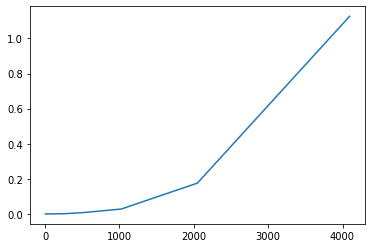

In [50]:
plt.plot(SIZE, TIME)